In [186]:
import warnings
warnings.filterwarnings('ignore');
import missingno as mno
pd.set_option('display.float_format', '{:.0f}'.format)

In [187]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
driver=webdriver.Firefox()

In [188]:
driver.refresh()
url='https://www.goibibo.com/hotels/find-hotels-in-Ayodhya,%20Uttar%20Pradesh,%20India/6558777989266324126/6558777989266324126/%7B%22ci%22:%2220231214%22,%22co%22:%2220231215%22,%22r%22:%221-2-0%22%7D/?{%22filter%22:{}}&sec=dom&cc=IN'
driver.get(url)    

In [189]:
#: Infinite Scroll ----> Scrolling till the end of the pages
def scroll_windows():
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
while True:
    old_height=driver.execute_script('return document.body.scrollHeight')
    scroll_windows()
    time.sleep(2)
    new_height=driver.execute_script('return document.body.scrollHeight');
    if new_height==old_height:
        break

In [190]:
#: extracting the divs of the each hotel
source=driver.page_source
soup=BeautifulSoup(source,'html.parser')
container_section=soup.find('section',class_='SRPstyles__RightSectionWrapperStyle-sc-19ucfhx-2 kzA-dLu')
container_div=container_section.find('div',class_='infinite-scroll-component')
divs=container_div.find_all('div',recursive=False)
filtered_divs=[]
for div in divs:
    id=div.get('id')
    if not id=="":
        filtered_divs.append(div)

In [191]:
#: total number of hotels:
print(f'Total Number of the hotels in Ajodhya: {len(filtered_divs)}')

Total Number of the hotels in Ajodhya: 117


In [211]:
#: Extracting the details of the hotels:
hotel_name=[]
room_price=[]
rating_counts=[]
total_rating=[]
location=[]
uid=[]
for div in filtered_divs:
    try:
        name=div.find('h4',class_='dwebCommonstyles__SmallSectionHeader-sc-112ty3f-10 kJLbNT').text
        hotel_name.append(name)
    except:
        hotel_name.append(None)

    try:
        id=div.get('id')
        uid.append(id)
    except:
        uid.append(None)

    try:
        price=div.find('p',class_='HotelCardstyles__CurrentPrice-sc-1s80tyk-32 koAFXT').text
        room_price.append(price)
    except:
        room_price.append(price)

    
    try:
        rate_count=div.find('span',class_='ReviewAndRatingsstyles__TotalReviewCountText-sc-1nxmeoo-4 MGJDY').text
        rating_counts.append(rate_count.split(" ")[0])
    except:
        rating_counts.append(None)


    try:
        total_rate=div.find('span',class_='ReviewAndRatingsstyles__AverageReviewText-sc-1nxmeoo-8 jzSqUD').text
        total_rating.append(total_rate.split('/')[0])
    except:
        total_rating.append(None)



    
    try:
        loc=(div.find('div',class_='PersuasionHoverTextstyles__TextWrapperSpan-sc-1c06rw1-15 cuVZrV').text)
        location.append(loc)
    except:
        location.append(None)

In [212]:
print('Hotel name: ',len(hotel_name))
print('prices: ',len(room_price))
print('Rating counts: ',len(rating_counts))
print('Total Rating: ',len(total_rating))
print('Address :',len(location))

Hotel name:  117
prices:  117
Rating counts:  117
Total Rating:  117
Address : 117


In [213]:
uid=[(id.split('seo_')[1]) if id is not None else id for id in uid]

In [214]:
df=pd.DataFrame({'Name':hotel_name,'Address':location,'Rating_count':rating_counts,'Total_Rating':total_rating,'Price':room_price,'Uid':uid})
df=df.map(lambda x: x.lower() if ((type(x)=='str') and (x is not None)) else x)
df.head()

,Name,Address,Rating_count,Total_Rating,Price,Uid
0,SHRI RAM HOTEL,New Colony,62,3.3,1245,6702352665539553781
1,"The Ramayana Hotel, Ayodhya",Ayodhya,95,4.5,4807,5423144992196519831
2,Hotel Shri Ram Bhavan Seeta Swayamvar Marriage...,Ayodhya,5,3.2,965,7429851557642181262
3,Hotel Shane Avadh,Lajpat Nagar,1372,3.5,1737,6483750189184718354
4,Anamika Palace,Faizabad,29,4.2,1236,1921599051016828600


<Axes: >

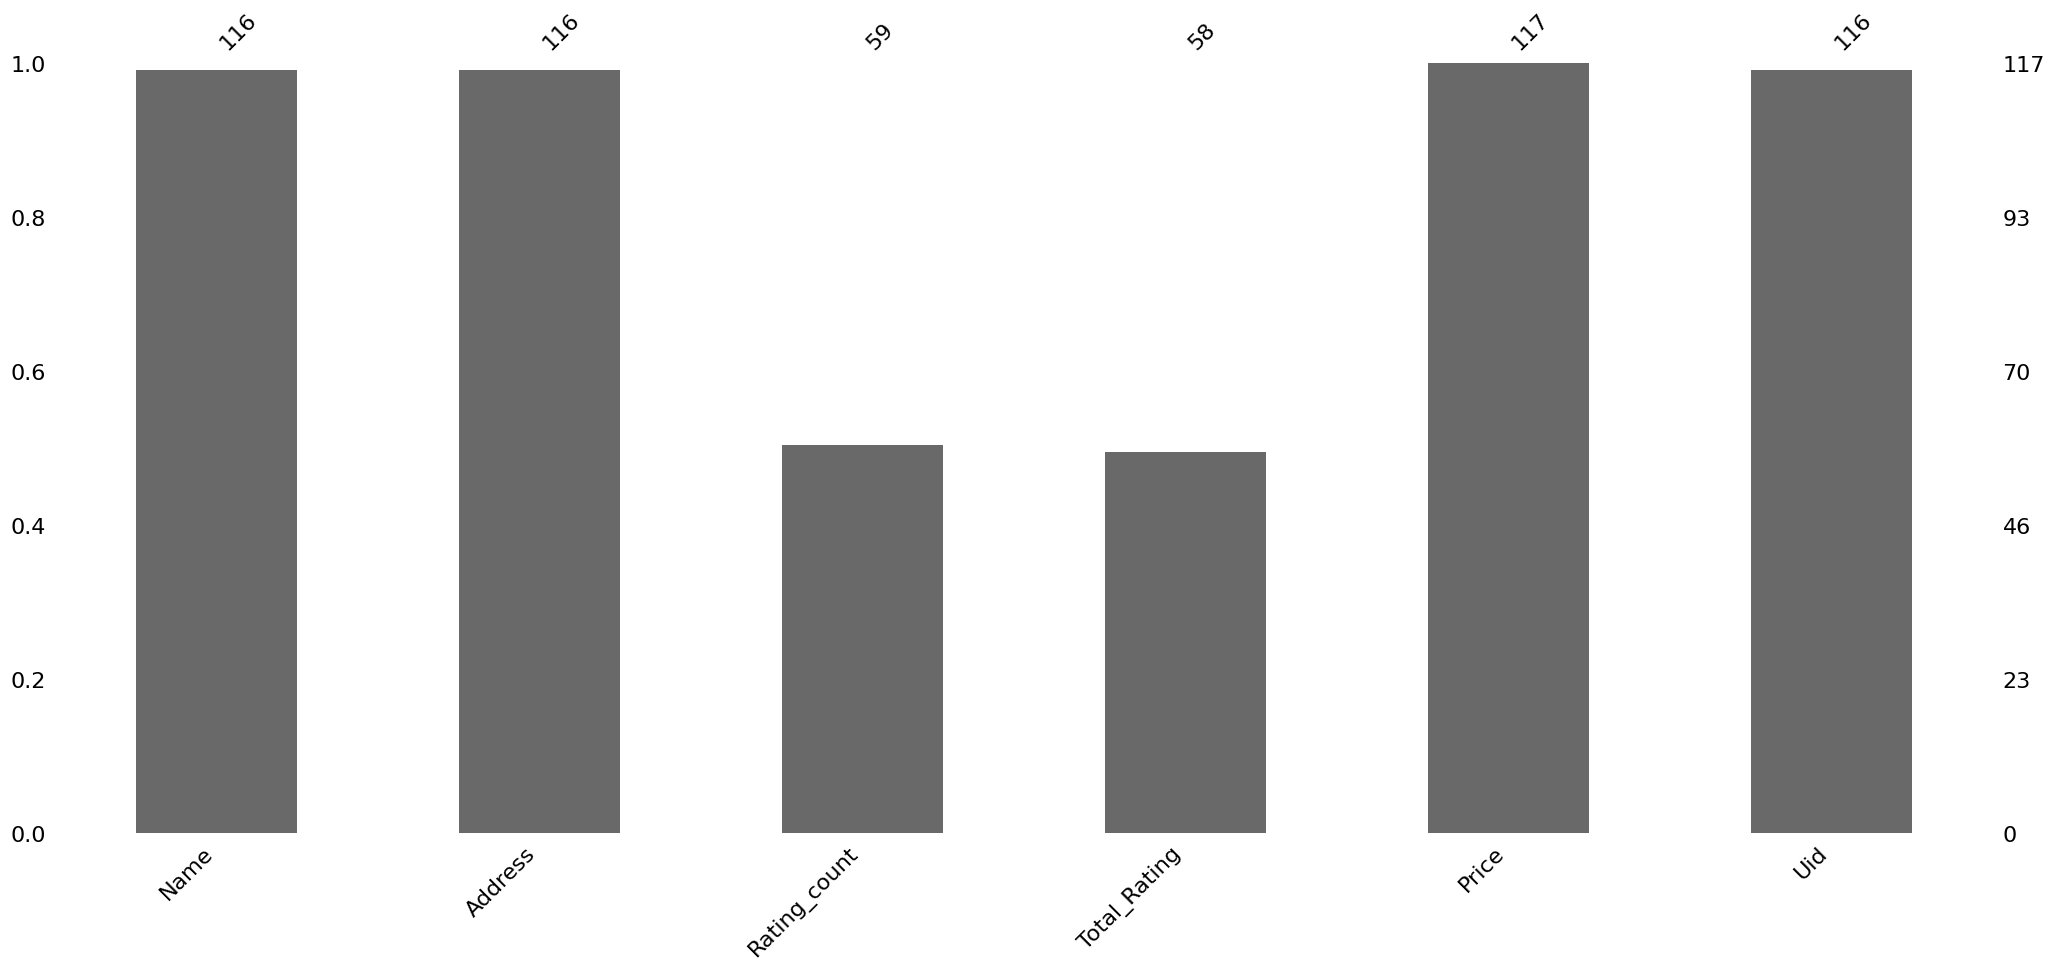

In [215]:
#: check the missing values
mno.bar(df)

In [216]:
#: missing values in rating and total ratings
df['Total_Rating'].fillna(0,inplace=True)
df['Rating_count'].fillna(0,inplace=True)

In [217]:
df.dropna(subset={'Name'},inplace=True)
df.isnull().sum()

Name            0
Address         0
Rating_count    0
Total_Rating    0
Price           0
Uid             0
dtype: int64

In [218]:
df.dtypes

Name            object
Address         object
Rating_count    object
Total_Rating    object
Price           object
Uid             object
dtype: object

In [219]:
#: fixing the dtypes of the dataframe
df['Rating_count']=df['Rating_count'].astype(int)
df['Total_Rating']=df['Total_Rating'].astype(float)
df['Price']=df['Price'].astype(int)

In [221]:
#: creating the link using the uid
for iuid in df['Uid']:
    link = f"https://www.goibibo.com/hotels/shri-ram-hotel-in-ayodhya,%20uttar%20pradesh,%20india-{uid}/?hquery={{%22ci%22:%2220231214%22,%22co%22:%2220231215%22,%22r%22:%221-2-0%22,%22ibp%22:%22%22}}&cc=IN&reviewType=gi&vcid=6558777989266324126&"
    


https://www.goibibo.com/hotels/shri-ram-hotel-in-ayodhya,%20uttar%20pradesh,%20india-6702352665539553781/?hquery={%22ci%22:%2220231214%22,%22co%22:%2220231215%22,%22r%22:%221-2-0%22,%22ibp%22:%22%22}&cc=IN&reviewType=gi&vcid=6558777989266324126&
https://www.goibibo.com/hotels/shri-ram-hotel-in-ayodhya,%20uttar%20pradesh,%20india-5423144992196519831/?hquery={%22ci%22:%2220231214%22,%22co%22:%2220231215%22,%22r%22:%221-2-0%22,%22ibp%22:%22%22}&cc=IN&reviewType=gi&vcid=6558777989266324126&
https://www.goibibo.com/hotels/shri-ram-hotel-in-ayodhya,%20uttar%20pradesh,%20india-7429851557642181262/?hquery={%22ci%22:%2220231214%22,%22co%22:%2220231215%22,%22r%22:%221-2-0%22,%22ibp%22:%22%22}&cc=IN&reviewType=gi&vcid=6558777989266324126&
https://www.goibibo.com/hotels/shri-ram-hotel-in-ayodhya,%20uttar%20pradesh,%20india-6483750189184718354/?hquery={%22ci%22:%2220231214%22,%22co%22:%2220231215%22,%22r%22:%221-2-0%22,%22ibp%22:%22%22}&cc=IN&reviewType=gi&vcid=6558777989266324126&
https://www.goib

In [185]:
df.to_excel('Hotel list from Goibibo.xlsx',index=False)

In [210]:
df['Link'][0]

"https://www.goibibo.com/hotels/shri-ram-hotel-in-ayodhya,%20uttar%20pradesh,%20india-['6702352665539553781', '5423144992196519831', '7429851557642181262', '6483750189184718354', '1921599051016828600', '3655952365979620267', '7576169651236198096', '8766165660680705899', '7310944461579318792', '2664251116948141756', '6184197107206342662', '123816889864401310', '6045552543121114373', '6631508403119424563', '8417173734233735416', '7825906927711860972', '6532762660115164792', '8734229810253133941', '1098150244516237528', '8407693788166102949', '2673925364586566449', '4200883082070833687', '8009516124994180382', '9049697015804740989', '8716761023891511923', '7970803498204955533', '1662739753578828747', '7367809031376089825', '8138552306636012371', '3247329181520449958', '2982058337593703737', '7377806356953993328', '8371562017632965606', '4299816891360835334', '6303027595771957569', '4554701205565441464', '1276488024276116953', '4999226720096549282', '2176341002649416265', '5057846272678064